In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

from reconstruction import recon
from reconstruction import recon_setup

In [2]:
#if you don't want to use the path chooser, just set the variables
outputPath = '/global/cfs/cdirs/als/users/parkinson/SLS_Feb2019/reconstructions/nerscrecons/'

# filename = '/20190524_085542_clay_testZMQ.h5'
# inputPath = '/global/u2/d/dula'
# filetype = 'als'
# slsnumangles = 1000
# slspxsize = 2.75
# firsttimepoint = 0
# lasttimepoint = 1
# timepointstep = 1
# cor = 947

filename = 'FiberForm_13A_air_200torr_05.h5'
inputPath = '/global/cfs/cdirs/als/users/parkinson/SLS_Feb2019/disk1/FiberForm_13A_air_200torr_05/'
filetype = 'sls'
slspxsize = 0.00081
slsnumangles = 1000
firsttimepoint = 179
lasttimepoint = 180 #last possible time point that works is 179, so set this to 180
timepointstep = 1 
cor = 990

# filename = 'RTV_18A_air_760torr_08_fast.h5'
# inputPath = '/global/cfs/cdirs/als/users/parkinson/SLS_Feb2019/disk1/RTV_18A_air_760torr_08_fast/'
# filetype = 'sls'
# slspxsize = 2.75
# slsnumangles = 400
# firsttimepoint = 0
# lasttimepoint = 1 #last possible time point that works is 104, set this to 105
# timepointstep = 1 
# cor = 386.25

In [3]:
functioninput = {
    "sinoused": (-1,1,1), #uncommenting this allows you to reconstruct just 1 slice instead of all of them
    "cor": cor, #set something other than None if you want to automatically detect center of rotation
    "filename": filename,
    "inputPath": inputPath,
    "outputPath": outputPath,
    "filetype": filetype,
    "timepoint": 0, #don't worry too much about setting time point here, it only affects COR detection.
    "doFWringremoval": 0,
    "slsnumangles": slsnumangles,
    "slspxsize": slspxsize,
    "writenormalized": 0,
    "dorecon": 1,
    "corFunction": 'vo',
    "voSMin": -150,
    "voSMax": 150,
}
recon_dictionary, cor_tomo = recon_setup(**functioninput)
#recon_dictionary['anglelist'] = np.linspace(0., np.pi, 1000)

cleaning up previous temp files, reading metadata
There are 2016 sinograms, 2016 rays, and 1000 projections
Looking at sinograms 1007 through 1007 (inclusive) in steps of 1
using user input center of 990


In [4]:
#optional, check cor, only works if you didn't set a cor already
from matplotlib.pyplot import figure
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

if isinstance(cor_tomo,np.ndarray):  
    def manualdetectcenter(shift_from_dead_center):
        figure(figsize=(24, 8))
        plt.imshow(cor_tomo[0,:,:] - np.roll(cor_tomo[1,:,::-1],shift_from_dead_center,axis=1),cmap='gray',vmin=-.2,vmax=.2)
        recon_dictionary['cor'] = cor_tomo.shape[2]/2 + shift_from_dead_center/2.0
        return shift_from_dead_center
    w = interactive(manualdetectcenter, shift_from_dead_center = (-150,150,1))
    w.children[0].value = 2*(recon_dictionary['cor'] - cor_tomo.shape[2]/2)    
    display(w)
else:
    print("COR was already set by user, no display available")

COR was already set by user, no display available


In [5]:
for timepoint in range(firsttimepoint,lasttimepoint,timepointstep):
    recon_dictionary['timepoint'] = timepoint

    #ONLY last chunk returned in rec, all are written to file

    rec, tomo = recon(**recon_dictionary)

Start FiberForm_13A_air_200torr_05.h5 at:Thu, 09 Jul 2020 17:07:43 +0000
Time point: 179
cleaning up previous temp files
sino chunk 1 of 1
normalize (took 0.01 seconds)
minus_log (took 0.01 seconds)
recon_mask Reconstructing 1 slice groups with 1 master threads...
(took 0.85 seconds)
write_reconstruction (took 0.07 seconds)
cleaning up temp files
End Time: Thu, 09 Jul 2020 17:07:48 +0000
It took 5.971 s to process /global/cfs/cdirs/als/users/parkinson/SLS_Feb2019/disk1/FiberForm_13A_air_200torr_05/FiberForm_13A_air_200torr_05.h5


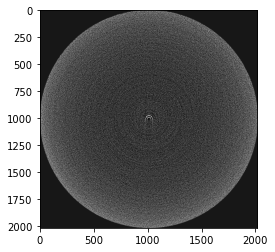

In [6]:
#plt.imshow(tomo[0,:,:],cmap='gray',vmin=.5,vmax=1.25)
plt.imshow(rec[0,:,:],cmap='gray',vmin=-.1,vmax=1)

In [7]:
#from itkwidgets import view
#view(rec)

# from ipysliceviewer import SliceViewer
# s = SliceViewer(volume=rec)
# s